In [1]:
import seaborn as sns
sns.set_theme(style="ticks")

Calling the constructor requires a long-form data object. This initializes the grid, but doesn't plot anything on it:

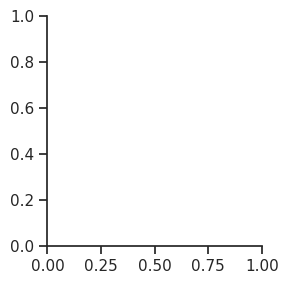

In [2]:
tips = sns.load_dataset("tips")
sns.FacetGrid(tips)

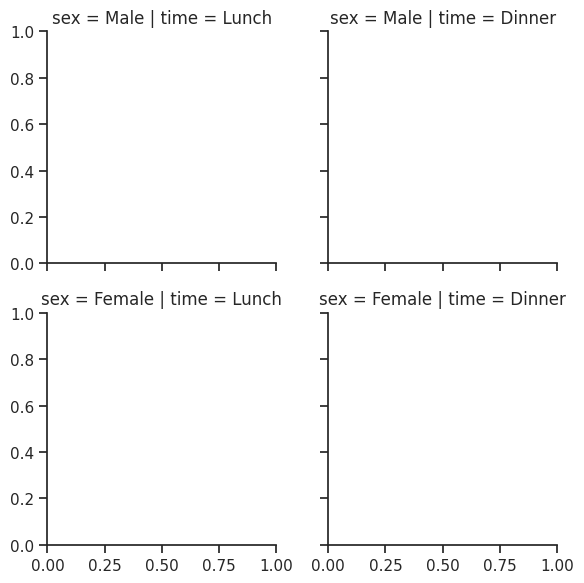

In [3]:
sns.FacetGrid(tips, col="time", row="sex")

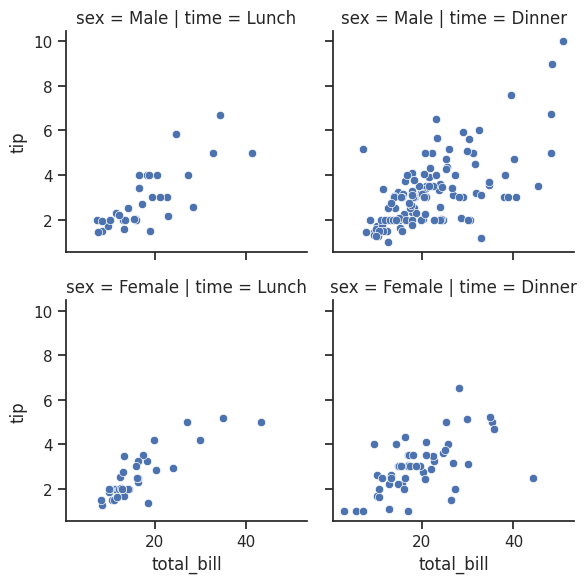

In [4]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

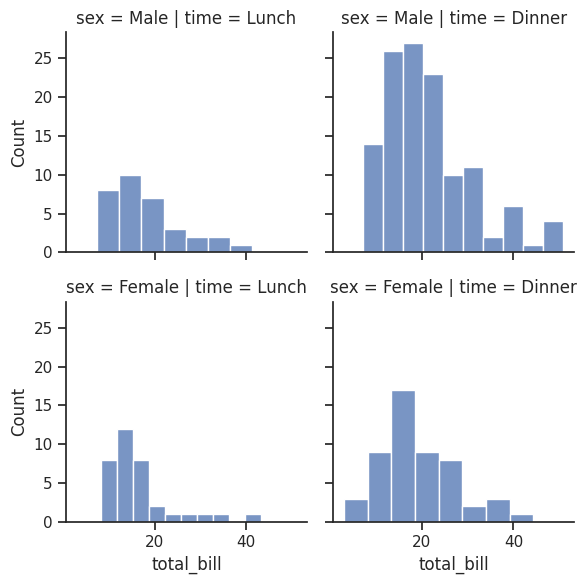

In [5]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

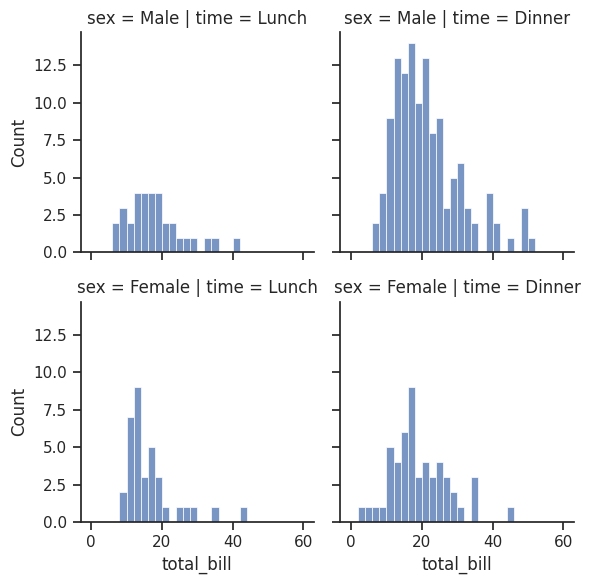

In [6]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map_dataframe(sns.histplot, x="total_bill", binwidth=2, binrange=(0, 60))

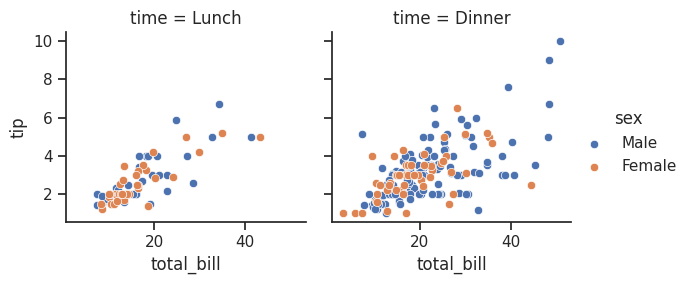

In [7]:
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

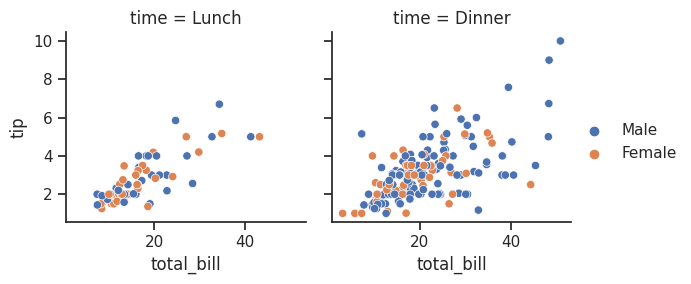

In [8]:
g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="sex")
g.add_legend()

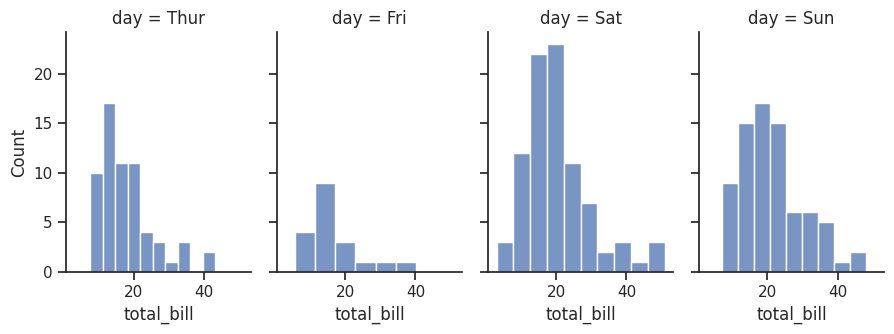

In [9]:
g = sns.FacetGrid(tips, col="day", height=3.5, aspect=.65)
g.map(sns.histplot, "total_bill")

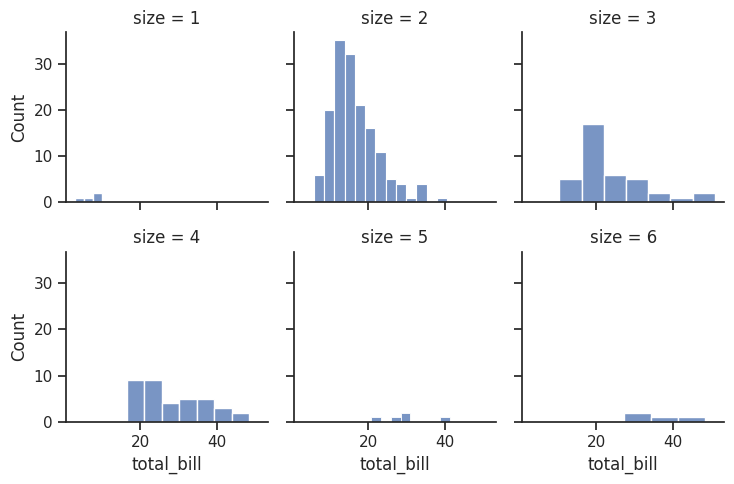

In [10]:
g = sns.FacetGrid(tips, col="size", height=2.5, col_wrap=3)
g.map(sns.histplot, "total_bill")

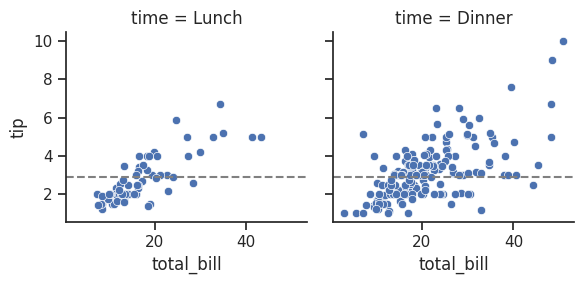

In [11]:
g = sns.FacetGrid(tips, col="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.refline(y=tips["tip"].median())

You can pass custom functions to plot with, or to annotate each facet. Your custom function must use the matplotlib state-machine interface to plot on the "current" axes, and it should catch additional keyword arguments:

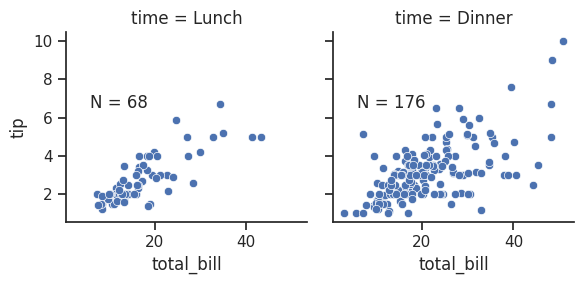

In [12]:
import matplotlib.pyplot as plt
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.map_dataframe(annotate)

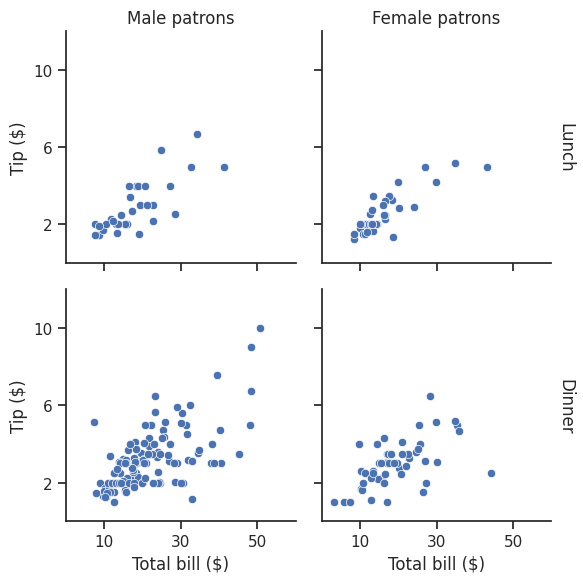

In [13]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill ($)", "Tip ($)")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
g.savefig("facet_plot.png")

In [14]:
import os
if os.path.exists("facet_plot.png"):
    os.remove("facet_plot.png")

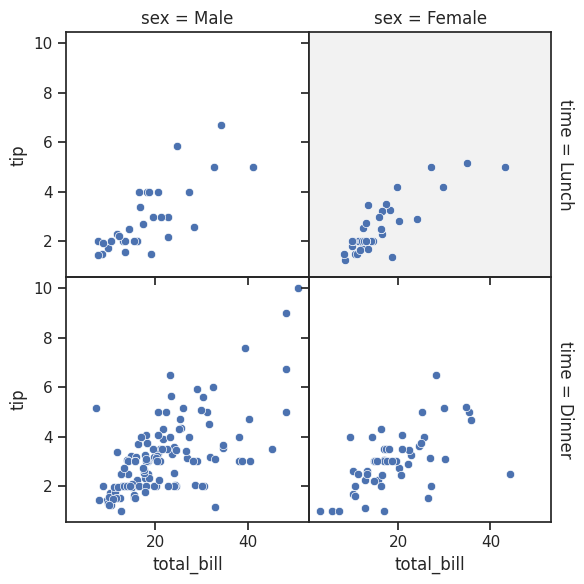

In [15]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.figure.subplots_adjust(wspace=0, hspace=0)
for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == "Lunch" and col_val == "Female":
        ax.set_facecolor(".95")
    else:
        ax.set_facecolor((0, 0, 0, 0))